# ANN Miranda vs Garcia Attributes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, sys, cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import backend as K
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split, KFold

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eager execution: True


In [4]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]

In [5]:
folder="../../../Dataset/GarciaLSB_Mono/" 
images=os.listdir(folder)
random.shuffle(images)
print(len(images))

89560


In [6]:
Garciay=getYFromImageList(images)
windowSize=128
GarciaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility', 'Complexity']
t = time.time()

GarciaX=pd.DataFrame(([ MirandaAttributes.attributes( cv2.imread( os.path.abspath(os.path.join(folder, images[i])) 
                                        ) ,windowSize,True)  for i in range(len(images))] ),columns=GarciaLabels)
elapsed = time.time() - t
print(elapsed)
GarciaX_train, GarciaX_test, GarciaY_train, GarciaY_test = train_test_split(GarciaX, Garciay, test_size=0.2, 
                                                                            random_state=0)

129.88843178749084


In [7]:
for i in range(10):
    print(Garciay[i],images[i])

1 stego_94_n03720891_10002.JPEG
1 stego_785_n07718747_17693.JPEG
1 stego_550_n02091032_4176.JPEG
0 408_n03920288_1681.JPEG
0 382_n07734744_6902.JPEG
0 467_n04557648_2543.JPEG
0 59_n03874599_4972.JPEG
1 stego_502_n01914609_531.JPEG
0 961_n02870880_2609.JPEG
0 865_n01558993_41556.JPEG


In [8]:
GarciaX.describe()

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
count,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000
mean,18.839275,2.661683,105.986309,752.725011,32.339013,47.358369,26.351446,0.292542,6.284255
std,37.811423,2.798862,90.359713,1293.498576,20.972414,343.772390,14.619686,0.179450,2.877352
min,1.215106,-1.784376,11.278783,65.000000,0.000000,1.781268,1.038634,0.083502,0.862264
25%,3.038474,0.974556,58.312400,240.000000,14.000000,27.533504,14.445271,0.180704,4.104427
50%,5.967701,1.826271,81.143871,377.000000,32.000000,37.364742,24.973864,0.239156,6.054802
75%,14.645378,3.223979,119.343935,694.000000,49.500000,46.581394,37.289886,0.334588,8.207084
max,254.003906,15.906097,1021.998047,16384.000000,91.500000,16384.000000,64.023018,1.419760,16.323956


In [9]:
sc=StandardScaler()

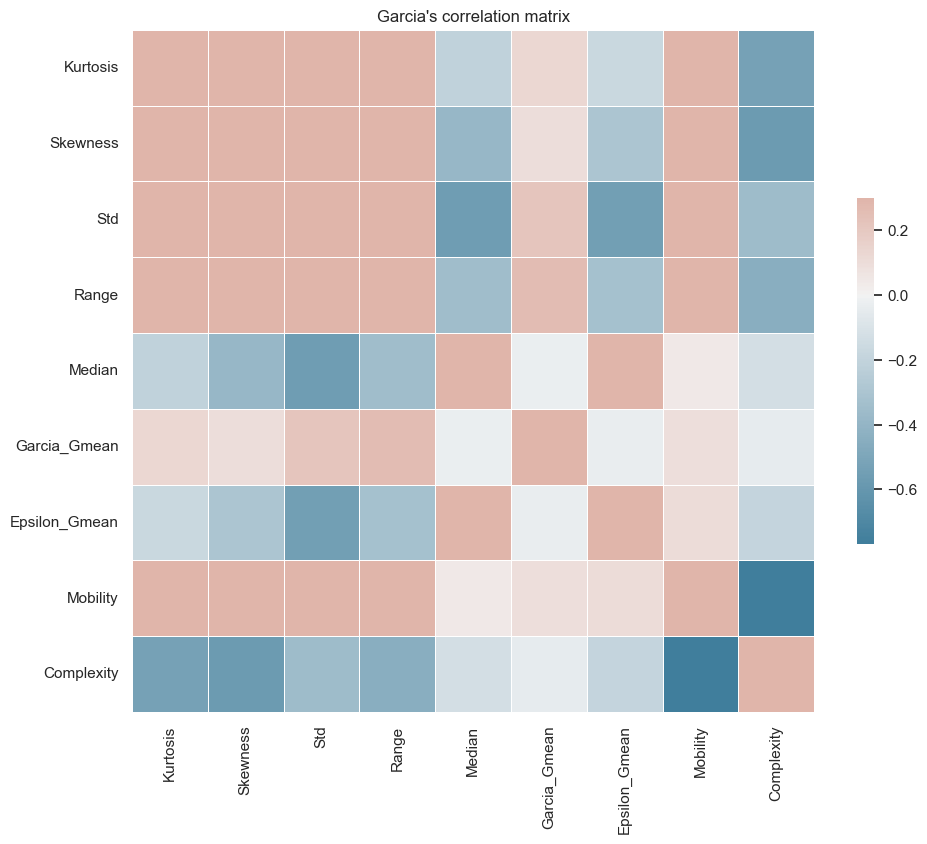

In [10]:
sns.set_theme(style="dark")
corr = GarciaX.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcia's correlation matrix")
plt.show()

In [11]:
kf = KFold(n_splits=5, shuffle=False)
acc_per_fold = []
loss_per_fold = []

#%% Feature Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler
sc.fit_transform(


In [12]:
sc = StandardScaler()
X_Train = sc.fit_transform(GarciaX_train)
X_Test = sc.transform(GarciaX_test)

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(9, activation=tf.nn.relu, input_shape=(9,)),  # input shape required
  tf.keras.layers.Dense(4, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(GarciaX_train, np.array(GarciaY_train,dtype=float), batch_size = 64, epochs = 250)

Epoch 1/250
1120/1120 [==============================] - 1s 1ms/step - loss: 1.5627 - accuracy: 0.4997
Epoch 2/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5029
Epoch 3/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 4/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 5/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5001
Epoch 6/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 7/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 9/250
1120/1120 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 10/250
1120/1120 [==============================] - 1s 1ms/step - l

In [14]:
print(model)
model.evaluate(GarciaX_test, np.array(GarciaY_test))
print(model.metrics_names)
#%% Predicting the Test set results

560/560 [==============================] - 1s 918us/step - loss: 0.6932 - accuracy: 0.4944
['loss', 'accuracy']


In [15]:
from sklearn import metrics

In [16]:
y_pred = (model.predict(GarciaX_test) > 0.5)
#%% Making the Confusion Matrix
cm = metrics.confusion_matrix(GarciaY_test, y_pred)
print("Confusion matrix\n",cm)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity :', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity :', specificity)
#%% 
print("Precision",metrics.precision_score(GarciaY_test, y_pred, average=None))
print("Accuracy",metrics.accuracy_score(GarciaY_test, y_pred))
print("F1",metrics.f1_score(GarciaY_test, y_pred, average=None))

Confusion matrix
 [[8856    0]
 [9056    0]]
Sensitivity : 1.0
Specificity : 0.0
Precision [0.49441715 0.        ]
Accuracy 0.4944171505136222
F1 [0.66168559 0.        ]


C:\Users\Administrador\anaconda3\envs\proyecto\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
